In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from requests import get

In [25]:
    #adr = get('https://api.ipify.org').text
    #sourceip = "https://stat.ripe.net/data/whois/data.json?resource="+adr+"%2F24"
    #responseip = requests.get(sourceip).json()
    #pref = responseip["data"]["records"][0][0]["value"]
    #pref=pref[0:(len(pref)-3)]
    #pref="91.232.100.0"
    pref="94.187.8.0"

In [29]:
url = 'https://stat.ripe.net/data/bgp-update-activity/data.json?endtime=2022-04-15T12%3A00%3A00&hide_empty_samples=false&max_samples=10000&resource='+pref+'&starttime=2021-04-29T00%3A00%3A00'
r = requests.get(url)
json = r.json()
df = pd.DataFrame(json['data']['updates'])
df.drop("starttime", axis=1, inplace=True)
r=df.shape[0]-1
nb=df.iloc[r,0:2].values
df = df.drop(df.shape[0]-1, axis=0)


[1 0]


In [ ]:
def total_av():
    m=df["announcements"].mean()
    i=0
    l=[]
    while (i<df.shape[0]):
        if (df["announcements"][i]<m):
            l.append(0)
        else:
            l.append(1)
        i=i+1
    df["label"]=l

#total_av()

In [14]:
def hourly_av():
    l=[]
    av=df["announcements"].mean()
    l.append(int(df["announcements"][0]>av))
    l.append(int(df["announcements"][1]>av))
    i=2
    while (i<df.shape[0]):
        m=(df["announcements"][i-1]+df["announcements"][i-2])/2
        if (df["announcements"][i]<m):
            l.append(0)
        else:
            l.append(1)
        i=i+1
    df["label"]=l
    
hourly_av()

In [15]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(df, test_size = 0.2)

In [16]:
X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values

In [17]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1,gamma=0.01)
classifier.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
Y_pred = classifier.predict(X_test)

In [19]:
pred_results = pd.DataFrame({'y_test': Y_test,
                             'y_pred': Y_pred})

In [20]:
print(pred_results)

      y_test  y_pred
0          0       1
1          0       1
2          1       1
3          0       0
4          0       1
5          1       1
6          1       1
7          1       1
8          0       1
9          0       0
10         1       1
11         1       0
12         0       0
13         1       1
14         0       1
15         0       0
16         0       0
17         1       1
18         0       1
19         1       1
20         1       1
21         0       0
22         1       1
23         1       1
24         1       0
25         1       1
26         1       1
27         0       1
28         1       1
29         0       0
...      ...     ...
1658       0       1
1659       0       0
1660       0       0
1661       1       1
1662       1       1
1663       1       1
1664       1       1
1665       0       1
1666       0       0
1667       0       1
1668       1       1
1669       1       1
1670       0       1
1671       1       0
1672       1       1
1673       0 

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [22]:
acc = accuracy_score(Y_test, Y_pred) 
prec = precision_score(Y_test, Y_pred) 
recall = recall_score(Y_test, Y_pred)

print("accuracy_score : ", acc) 
print("precision_score : ", prec) 
print("recall_score : ", recall)

accuracy_score :  0.6883886255924171
precision_score :  0.6405797101449275
recall_score :  0.8115055079559363


In [83]:
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d
clf=RandomForestClassifier(n_estimators=100)


clf.fit(X_train,Y_train)

y_pred=clf.predict(X_test)

In [84]:
acc = accuracy_score(Y_test, y_pred) 
prec = precision_score(Y_test, y_pred) 
recall = recall_score(Y_test, y_pred)

print("accuracy_score : ", acc) 
print("precision_score : ", prec) 
print("recall_score : ", recall)

accuracy_score :  0.6907582938388626
precision_score :  0.6676557863501483
recall_score :  0.7839721254355401


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [100, 200, 300, 1000]}

grid_search = GridSearchCV(RandomForestClassifier(), parameters, return_train_score=True)
grid_search.fit(X_train, Y_train)

grid_search.best_params_

{'n_estimators': 100}

In [93]:
for i in range(4):
    print('Parameters: ', grid_search.cv_results_['params'][i])

    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])

Parameters:  {'n_estimators': 100}
Mean Test Score:  0.6844991108476586
Parameters:  {'n_estimators': 200}
Mean Test Score:  0.6825726141078838
Parameters:  {'n_estimators': 300}
Mean Test Score:  0.6833135743924126
Parameters:  {'n_estimators': 1000}
Mean Test Score:  0.6837581505631298


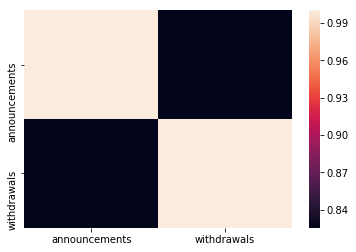

In [30]:

import seaborn as sns
df.drop('label',axis=1,inplace=True)
sns.heatmap(df.corr());

In [94]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],'gamma':[0.0001, 0.001, 0.01, 0.1, 1],'kernel':['linear','rbf','sigmoid']}

grid_search = GridSearchCV(SVC(), parameters, return_train_score=True)
grid_search.fit(X_train, Y_train)

grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [95]:
for i in range(90):
    print('Parameters: ', grid_search.cv_results_['params'][i])

    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])

Parameters:  {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'linear'}
Mean Test Score:  0.5958802608180201
Parameters:  {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
Mean Test Score:  0.5020746887966805
Parameters:  {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'sigmoid'}
Mean Test Score:  0.5020746887966805
Parameters:  {'C': 0.0001, 'gamma': 0.001, 'kernel': 'linear'}
Mean Test Score:  0.5958802608180201
Parameters:  {'C': 0.0001, 'gamma': 0.001, 'kernel': 'rbf'}
Mean Test Score:  0.5020746887966805
Parameters:  {'C': 0.0001, 'gamma': 0.001, 'kernel': 'sigmoid'}
Mean Test Score:  0.5020746887966805
Parameters:  {'C': 0.0001, 'gamma': 0.01, 'kernel': 'linear'}
Mean Test Score:  0.5958802608180201
Parameters:  {'C': 0.0001, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Test Score:  0.5020746887966805
Parameters:  {'C': 0.0001, 'gamma': 0.01, 'kernel': 'sigmoid'}
Mean Test Score:  0.5020746887966805
Parameters:  {'C': 0.0001, 'gamma': 0.1, 'kernel': 'linear'}
Mean Test Score:  0.5958802608180201
Paramete